<a href="https://colab.research.google.com/github/vanislekahuna/Portfolio-Projects/blob/main/The_story_of_Bayes'_Theorem_Using_PySpark_and_Google_Colab_to_build_an_ML_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The story of Bayes' Theorem:** 
## **Using PySpark and Google Colab to build a Naive Bayes ML Algorithm**

## **Preface** (Story)

Thomas Bayes was growing deeply concerned for his fellow neighbours in their sleepy village of Victoria, located on the tiny island of Malta. He had heard an increasing amount of stories lately from residents about letters that had convinced them to give away significant amounts of money to the fraudulent sender. The content of many of these letters included threats by the King's Guard of unpaid taxes or estranged family members requiring money quickly for prison bail. As this was a new phenomenon in 1736, the townspeople referred to this form of deception as [spam]('https://www.malwarebytes.com/spam'). They believed it was coming from a group of local thieves who gathered sensitive information about the villagers.

This issue also concerned the town's leadership, who passed a motion to grant Lordship to anyone with a solution for consistently identifying spam letters. As a bright and concerned individual, Thomas was driven to take part in this initiative. However, his mentor, Prof. Frequentia, dissuaded him from wasting his time. Prof. Frequentia had already researched the frequency of spam and concluded that it was bound to appear in just 13% of all letters sent. 

Thomas was not convinced that Prof. Frequentia's statistics were set in stone. He found it hard to believe that within a given set of letters, there must always be at least 13% that were fraudulent. After spending a few days reflecting on the problem, Thomas constructed a hypothesis. Thomas thought to himself: *With enough training, any na&#239;ve individual may be able to detect the presence of spam by studying a large sample of letters and learning the distinct characteristics of spam. The more letters one could train on, the better one should be at detecting spam!* Thomas later called this method the **" (1) Data Collection, (2) Create & Train, (3) Test & Evaluate, & (4) Predict"** framework for correctly classifying whether a letter was spam or not and decided to put it to the test.

## **Step 1 - Data Collection** (Story)

Knowing that he had made up his mind, Prof. Frequentia recommended Thomas to seek the consult of his colleagues at the [UCI]('https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection') for the data they had on spam. "As you know, UCI is Malta's premier public university. Within their research library is a collection of letters that were pre-labelled as either spam or not that's available for you to study from," the Professor explained to Thomas. Thomas took up his mentor's advice and paid a visit to the university's library. Upon accessing the dataset, Thomas realized that his mentor must have got his statistics from this source and assumed them to be representative of the entire population. Thomas' preliminary findings supported Prof. Frequentia's initial assertion that 13% of letters in this dataset were spam while the remaining 87% were not. 

However, Thomas looked past these initial stats and cleaned/prepared the data to test a different approach for correctly predicting the occurrence of spam. Since UCI's collection contained a 5,572 sample of pre-labelled letters, Thomas was confident that it was large enough to infer his findings to the real-world problem. Next, Thomas spent next several months developing a model and collaborating with his closest companions on this very problem.

Once Thomas felt that he had a solution to the problem, he gathered his nearby contemporaries to discuss the principles of his newfound proposition (or **theorem**). In the following lecture, Thomas' proposed the following axioms (or principles), which argue that our inherent ability to learn comes from updating our pre-existing beliefs, based on the significance of the new information we encounter.

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
from collections import Counter
import re
import plotly.express as exp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms = pd.read_csv('https://dq-content.s3.amazonaws.com/433/SMSSpamCollection', sep='\t', header=None, names=['Label', 'SMS'])

print("Total number of rows and columns in the SMS dataset: {}".format(sms.shape), '\n',
      "Total number of non-spam messages: {}\n".format(sms['Label'].value_counts()[0]),
      "Total number of spam messages: {}\n".format(sms['Label'].value_counts()[1]),
      "Total percentage of non-spam messages: {}%\n".format(round(sms['Label'].value_counts(normalize=True)[0] * 100, 2)),
      "Total percentage of spam messages: {}%\n".format(round(sms['Label'].value_counts(normalize=True)[1] * 100, 2)))

sms.head()

Total number of rows and columns in the SMS dataset: (5572, 2) 
 Total number of non-spam messages: 4825
 Total number of spam messages: 747
 Total percentage of non-spam messages: 86.59%
 Total percentage of spam messages: 13.41%



,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Step 2 - Model Creation and Training** (Story)


## **The Principles of Bayes' Theorem**



### **Principle One - Degrees of Belief**

Thomas' **first principle** is that through experience, everyone has their own pre-existing beliefs towards any particular view, idea, or event. Thomas termed this as people's **priors beliefs**. So, for example, villagers who have had many encounters with spam mail are more inclined to believe that spam is a broader issue than those who haven't experienced spam as much. 

To explain his reasoning, Thomas fondly thought of his wife, Andrea. Andrea, like him, was a massive fan of the Vancouver Grizzlies Club and wasn't afraid of taking on opposing bets against her club. "Suppose that my wife, Andrea, is a smart and rational gambling woman with only €100. If so, we can ascertain that the amount that Andrea is willing to gamble quantitively represents her **degree of belief** in the outcome she's betting on." Andrea's prior belief is quantified by the $P(H_{ypothesis})$ variable in Bayes' Theorem below.


### **Principle Two - Bayesian Conditionalization**

Now, if all presented was the idea that objective reality is a matter of subjective interpretation, Thomas would have surely been run off the stage by his colleagues. However, the next principle that Thomas proposed added a layer of sophistication and intrigue in his proposal. Thomas' **second principle** argued that rational people would begin to update their prior beliefs over time with enough exposure to new data. Thomas termed this process as **conditionalization** and used the variable $P(E_{vidence})$  in his Theorem to represent the data influencing a person's beliefs. Thomas then cemented this principle with his audience by returning to the previous example of his wife's conviction towards the Grizzlies. 

"My friends, for instance, suppose Andrea was willing to bet &euro;80 out of the &euro;100 she has on a Grizzlies victory over their opposition. In that case, we can infer that her **prior belief** $P(H)$ at that point is 80%, yes? Now, what if Andrea later discovers a 60% chance that Kobe, the club's best player, will not play in the next match due to injury. How would that change Andrea's belief in the club's chances, given their best player was unavailable for the next game?" Thomas asked. "From this scenario, it's reasonable to assume that the new evidence will likely change Andrea's degree of belief in the club's chance of success."

The interaction between Andrea's prior beliefs and the evidence presented eventually forms a **posterior belef,  $P(H_{ypothesis}|E_{vidence})$**, Thomas continued. "In other words, a person's posterior belief is the result of them updating their beliefs based on the information they encounter. A common phrase to describe this idea is that [today's posterior is yesterday's prior]('https://www.youtube.com/watch?v=jvw74s9yu1U&t=2520s')." 

"The basic formula for **conditional probability** represents Bayes' Theorem in its simplest form *if* all the likelihoods surrounding the prior and the evidence being true are known. If so, then **Bayes' Theorem** can be calculated by dividing the *probability of both the prior belief and the evidence occurring at the same time* (i.e. intersecting $ \cap $ in mathematical terms $P(H \cap E)$) with the *probability of the evidence being true $P(E)$*." 

As Thomas was lecturing, he wrote the following equation below on the large slate provided by the university.

**Conditional Probability Formula**:  $P(H|E) =  \frac{P(H \cap E)}{P(E)} $


<br>

*This process can also be described visually using the Venn Diagrams below:*

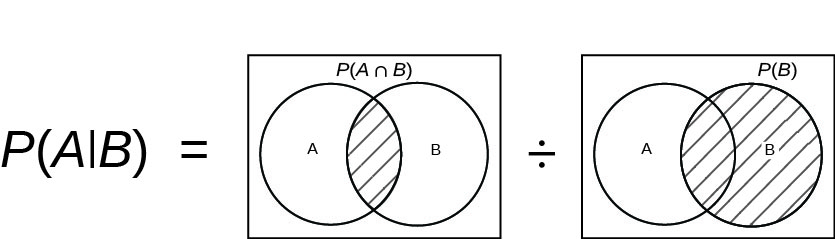

[Photo Source]('https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Business_Statistics_(OpenStax)/03%3A_Probability_Topics/3.05%3A_Venn_Diagrams')

### **Principle Two continued...**

As he was lecturing, Thomas was praying that he wasn't losing his colleague's attention due to the complexity of his topic. Yet, despite his concerns, Thomas continued to press on with his lecture notes.

"Let's suppose that the probability of both the prior belief and the evidence occurring at the same time $P(H \cap E)$ is *unknown*. In this case, we can break down the intersection of these two events and see how they interact to form the whole. The first event is represented by the **probability of the hypothesis occurring** (i.e. their prior beliefs) $P(H)$. Now my friends, bear with me as the second event can be challenging at first to comprehend. The second event represents the **inverse probability** of the evidence occurring, given the hypothesis took place."

As expected, when Thomas introduced the idea of inverse probabilities, several of his colleagues replied with head scratches and blank stares.  *At least they're engaged,* Thomas thought to himself as he began the journey of breaking down this concept.  

<br>

*Using the **Inverse** and the **Prior** to find the probability that the $H_{ypothesis}$ and the $E_{vent}$ will happen at the same time:* $P(H \cap E) = P(H) \times  P(E | H)$

<br>

"The value of the **inverse probability** $P(E | H) $ is often 1 if we know for sure that the occurrence of one event *directly* causes another. So, for example, if Andrea were to receive evidence (via a press release) that the opposing club planned to forfeit the match, then she could be certain that that information would *directly* lead to a Grizzlies victory." At this point, Thomas publicly acknowledged his colleague, **[Richard Price]('https://www.probabilisticworld.com/inverse-problem-bayes-theorem/')**, who was integral in helping him develop this idea of inverse probabilities. "However, in the case of Kobe's injury, an inverse probability of $P(E|H) = 1$ does not apply here. This is because Kobe's production isn't the only determinant of the Grizzlies' success. Other factors like his teammate's preformance or how well the other team's star player is playing can all affect the game's outcome. But for argument's sake, since Kobe typically scores 30% of the club's total points every game, we'll use 30% as a proxy for his impact on a match, and by extension, as the inverse probability."

"Given the new information, Andrea can now use **Bayes' Theorem** to calculate the chances of a Grizzlies victory, granted that Kobe is unavailable to play in the next match."

**Bayes' Theorem:** $ P(H_{ypothesis}| E_{vidence}) = \frac{P(H) \times P(E|H)}{P(E)}$

In *English*: $ P(H_{victory}| E_{unavailable}) = \frac{0.8 \times 0.3}{0.6}  $

$ P(H| E) = 0.4 $

<br>

"Regarding Andrea's new posterior probability, it's clear that Kobe's injury status has cut her belief in the team's chances by half - 40%. But because she's a loyal fan of the club, Andrea is still willing to bet &euro;40 on the club's victory," Thomas concluded about his second principle. 



### **Principle Three - Law of Total Probability**


To Thomas, his last principle seemed fairly obvious. Still, he felt he needed to discuss the following idea because it allowed practitioners to account for the alternative of an event not happening. This concept often comes up in economics which practitioners of the field often refer to as **opportunity cost**. In fact, it was through the brilliant insight of Richard, who himself was an accomplished mathematician in addition to being a Minister and a Moral Philosopher, that Thomas even developed this principle. 

"Now, my friends, let's discuss the third and final principle of Bayes' Theorem, the Law of Total Probability. From what Richard and I had developed, the **Law of Total Probability** reasons that a person's subjective **degrees of belief** towards a future event taking place can be quantified between a range of 0-100%. The extreme ends of this range is represented by 0, which signifies that an event, without a doubt, WILL NOT take place and 1, which symbolizes total certainty that an event WILL take place.

The **Law of Total Probability** is especially relevant to our denominator in Bayes' Theorem, $P(E)$. Going back to the example of Kobe's availability, only two possible outcomes can occur here. We can characterize this event as **exhaustive** because we know all the conceivable outcomes. In addition, we can also call this a **mutually exclusive** event which means that all outcomes must happen exclusively; they can't happen together. Either Kobe is available to play, and his chances of missing the match is `0`. OR he is too injured and, without a doubt, will sit the next match, `1`. Both events significantly alter the club's chances of victory. 

The **Law of Total Probability** can be used to calculate the probability of the evidence being true. This equation can be used for more than one event if needed, such as the case with multiple players on Andrea's injury watchlist."

Thomas then wrote the following ways of calculating the **Law  of Total Probability** on his large slate:

*The method to represent 2 or more events:*
$P(E) = P(H_{1} \cap E) + P(H_{2} \cap E) + P(H_{3} \cap E)$ 


*which can be broken down to...*
$ P(E) = (P(H_{1}) \times P(H_{1}|E)) + (P(H_{2} \times P(H_{2}|E))... (P(H_{n} \times P(H_{n}|E)) $


*and can be summarized using the general formula...*
$P(E) = {\sum_{i=0}^{n} P(H_{i}) \times P(E|H_{i})}$  

### **Bayes' Theorem**

After explaining the principles of his theorem, Thomas then summarized the various ways of writing his equation on his massive slate. 

**Conditional Probability Formula** - the most basic form of his theorem: $ P(H_{ypothesis}| E_{vidence}) =  \frac{P(H \cap E)}{P(E)} $


**Bayes' Theorem** in it's most common form: $ P(H| E) = \frac{P(H) \times P(E|H)}{P(E)}$

And lastly, **Bayes' Theorem** if the probability of the evidence being true $P(E)$ is unknown: $ P(H| E) = \frac{P(H) \times P(E|H)}{\sum_{i=0}^{n} P(H_{i}) \times P(E|H_{i})}$

<br>

At this point, Thomas was becoming confident in his audience's grasp of his new Theorem. To further cement the idea of today's posterior being an evolution of yesterday's prior, Thomas, again, referred to the example of Kobe's injury status affecting Andrea's belief in the team.

"On the day of the match, Andrea receives word of a press release that Kobe had a fantastic sleep the night before and was 80% confident that he could play tonight. In light of this new evidence, the probability of Kobe being *unavailable* to play $ P(E) $ has now dropped significantly from 60% yesterday to 20% today. To Andrea, this new information significantly changes her belief in the club's chances of victory for tonight's match. Her posterior probability yesterday on the club's chances of winning have become he **prior probability** $ P(H) $ today." Thomas then plugged these numbers into a formula to demonstrate how Bayes' Theorem is used in practice:

Calculating for the updated **Posterior Probability**: $ P(H| E) = \frac{0.4 \times 0.3}{0.2}  $

$ P(H| E) = 0.6 $

News of Kobe's increased likelihood to play tonight increased Andrea's confidence in the team's success. To recap, $ P(H|E) $ is interpreted as Andrea's belief in the club's chances of success, given that their star player is unavailable. Since Kobe's chances of being unavailable have dropped significantly to 20%, Andrea believes that the club has a 60% chance of success. Therefore, Andrea will likely increase her bet from &euro;40 yesterday to &euro;60 today to reflect her updated degree of belief.

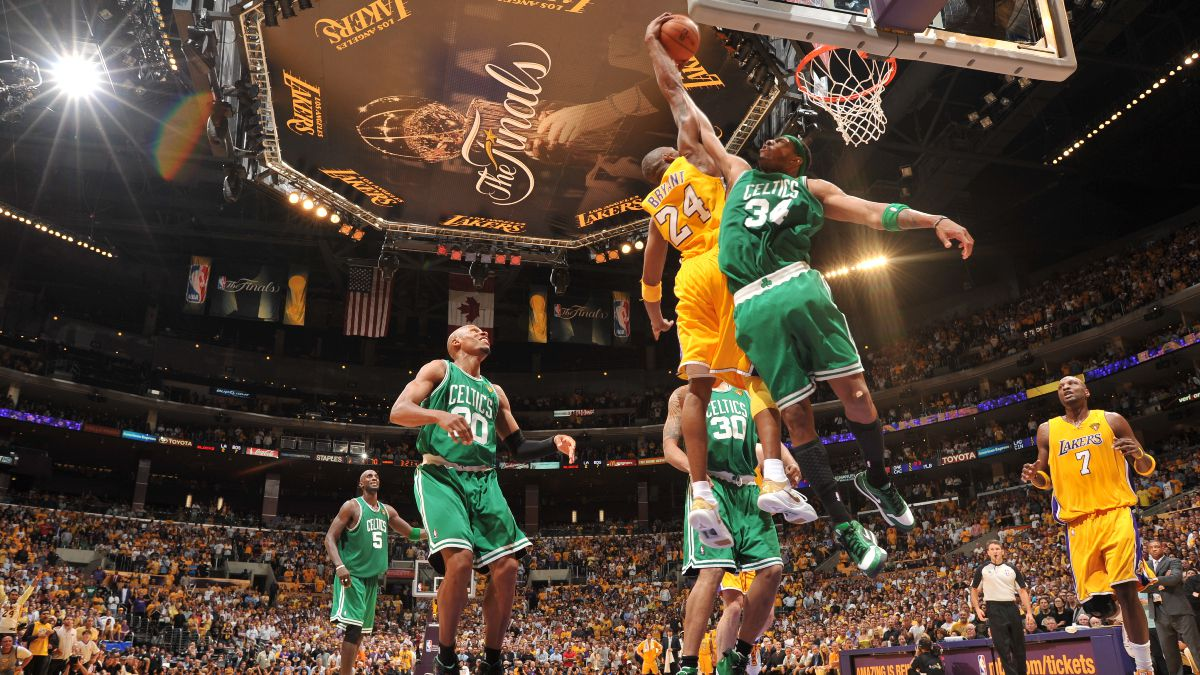

[Photo Source]('https://www.nydailynews.com/sports/gambling/sns-actnet-director-cut-game-7-2010-nba-finals-20200319-qy4rmkr2gngjzknne6hjbfqxg4-story.html')

### **Introducing the Multinomial Na&#239;ve Bayes Algorithm** (Story)

With this, Thomas' audience rose with thunderous applause! It was clear that their colleague had discovered a way to mathematically model and quantify the process of learning through updated beliefs. Prof. Frequentia was especially pleased with his pupil's new breakthrough. Yet, he was still hyper-focused on solving the town's plaguing problem. When the cheering died down, Prof. Frequentia re-focused the audience's attention towards the main concern: *How does Thomas' new Theorem apply to the issue of spam mail?*

Prof. Frequential returned the spotlight back to his pupil and argued: "From your argument, Bayes' Theorem can theoretically be used to calculate the likelihood of a fraudulent letter if, and only if, a single word was capable of this prediction. Therefore, we can think of this Theorem as the probability that a letter is a spam given the appearance of a particular word in it $ P(Spam|w_{1}) $. But, of course, no single word can distinguish a fraudulent letter from those that are legitimate. That would be impossible in a typical letter with hundreds, even thousands, of words.

Thomas agreed. *Of course, his theorem alone wasn't capable of correctly classifying spam messages*. Yet, the solution was now closer than his colleagues realized. To fully apply his theorem to the problem of spam, Thomas explained the set of rules he developed for detecting spam mail, which he termed as the **Na&#239;ve Bayes Algorithm**:

 1. Calculate the constants;
 2. Generate the word parameters $P(w_{n}|S_{pam})$ for spam letters and multiply them together to find $P(S_{pam}| w_{ords})$;
 3. Generate the word parameters $P(w_{n}|N_{onspam})$ for nonspam letters and multiply them together to find $P(N_{onspam}| w_{ords})$;
 4. Compare $P(S_{pam}| w_{ords})$  with $P(N_{onspam}| w_{ords})$ and classify the letter based on whichever has the higher percentage.


 Thomas launched his initial counter by restructuring his mentor's question - *What is the probability that the following letter is $S_{pam}$ given all the $w_{ords}$ in it?*

$$ P(S_{pam}| w_{ords}) = \frac{P(S_{pam}) \times P(w_{ords}|S_{pam})}{P(w_{ords})} $$

Immediately, Thomas sensed the confusion from the puzzled faces of his audience. Many of his colleagues wondered how to calculate the probability of words in the message - $P(w_{ords})$? "The answer was simple," Thomas told them. "We must simply find the probability that all the words in the message will appear *together*." Thomas then drew the following equation on his chalkboard: $P(W_{ords}) = P(w_{1}) \times P(w_{2}) \times P(w_{3}) \times ... P(w_{n})$. 

"In doing so, each individual word now becomes a predictor for whether the message is spam," Thomas continued. "Effectively, this method splits the **inverse probability** $P(w_{ords}|S_{pam})$ and the **probability of the evidence** $P(w_{ords})$ into several parts. However, the $P(S_{pam})$ doesn't change as it still represents the individual's **prior belief** about the occurrence of spam. For example, from Prof. Frequentia's point of view, his initial prior $P(S_{pam})$ would be 13% based on his previous research."

$$ P(S_{pam}| w_{1}, w_{2}, ... w_{n}) = \frac{P(S_{pam}) \times P(w_{1}|S_{pam}) \times P(w_{2}|S_{pam}) \times ... P(w_{n}|S_{pam})}{(P(w_{1}) \times P(w_{2}) \times ... P(w_{n}))} $$

At this point, Prof. Frequentia interjected. " What is the use in calculating the inverse probability of specific words if that word can appear just as frequently in both spam and nonspam messages? For example, most spam messages usually have something to do with money, so the word 'money' often appears in spam messages. However, regular conversations about money are just as frequent. Therefore the word 'money' should appear just as often amongst nonspam messages, so how would the algorithm be able to differentiate between the two contexts? Was it possible to calculate the **inverse probability** of a word $ w_{n} $ as $P(w_{n}|S_{pam})$ AND $P(w_{n}|N_{onspam})$?" 

Thomas had a solution to that problem too. Thomas explained that the inverse probability for each word could be found through a **[multinomial]('('https://www.quora.com/What-is-the-difference-between-a-Gaussian-Multinomial-and-Bernoulli-Naive-Bayes-classifier')')** solution. "In this instance, a multinomial solution involves *counting the number of times a word appears in the message*, then dividing that by *the total number of words in our sample of spam messages*:" $ P(w_{1}|S_{pam}) = \frac{N_{w_{i}|spam}}{N_{spam}} $. 

Among the attendees in the lecture hall was Pierre, another one of Thomas' closest confidants. Amongst his peers, Pierre was highly regarded as a polymath with subject expertise in various fields, not limited to mathematics, statistics, astronomy, and philosophy. Listening intently in Thomas' lecture, Pierre noticed a flaw in Thomas' solution and interjected. "There may be times that the algorithm may have to divide $0$ from the total because some words may only appear in the nonspam messages, but not in the spam messages, and vice-versa: $ \frac{0}{N_{spam}} = 0 $." Thomas immediately knew he was right. He hadn't accounted for that error and now feared that his algorithm wouldn't be able to solve the problem. Luckily, Pierre had an idea to remediate Thomas' error and was eager to share his past research breakthroughs with the audience. 

Walking to the front of the lecture theatre, Pierre shared a technique he developed in the past called **Laplace Smoothing**. "With Laplace Smoothing," Pierre explained, "one must simply add a **smoothing parameter $ \alpha $** to every word so that we get non-zero results in the parameters. A **Laplace Smoothing** of $ \alpha = 1 $ is common for most smoothing parameters." As soon as Pierre had finished presenting his solution, Thomas immediately felt a breath of fresh air, relief, and gratitude towards his friend. Thomas recognized the ingenuity of his friend's solution and utilized it in his algorithm so that it could better calculate **inverse probabilities**:

$$ P(w_{i}|Spam) = \frac{N_{w_{i} | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}}$$

With Pierre's solution, Thomas was confident that his algorithm could solve the bane of many of the villagers' existence. Additionally, Thomas pointed out that the algorithm was termed **na&#239;ve** because it innocently assumes [conditional independence]('https://en.wikipedia.org/wiki/Conditional_independence') amongst its underlying parameters. However, in practice, the parameters in a model are rarely fully independent. This means that the algorithm presumes that the words aren't correlated, even though they often were. For example, Thomas noticed that the words "emergence" and "money" often come up in spam messages, which means there should inherently be some correlation between the two words. However, this naïve assumption of conditional independence simplifies the algorithm immensely because it means that the correlations between the words don't have to be accounted for. 

Lastly, because the denominator $P(w_{ords})$ is shared amongst all the parameters, it can be excluded from the algorithm to simplify it as much as possible. Now that Thomas had finished presenting the rationale behind the **Multinomial Na&#239;ve Bayes Algorithm**, he wrote the following equations on his slate to summarize his newly developed techniques:

<br>

**Bayes' Theorem**: $ P(S_{pam}| w_{ords}) = \frac{P(S_{pam}) \times P(w_{ords}|S_{pam})}{P(w_{ords})} $

<br>

**Bayes' Theorem Deconstructed**: $P(S_{pam}| w_{1}, w_{2}, ... w_{n}) = \frac{P(S_{pam}) \times P(w_{1}|S_{pam}) \times P(w_{2}|S_{pam}) \times ... P(w_{n}|S_{pam})}{(P(w_{1}) \times P(w_{2}) \times ... P(w_{n})} $

<br>

**Multinomial Na&#239;ve Bayes Algorithm**: $ P(Spam|w_{1}, w_{2},... w_{n}) \propto P(Spam) \times P(w_{1} | Spam) \times P(w_{2} | Spam) \times ... P(w_{n} | Spam)  $

<br>

**Multinomial Na&#239;ve Bayes Algorithm Simplified**: $P(Spam|w_{1}, w_{2},.... w_{n}) \propto P(spam) \times \prod_{i=1}^{n} P(w_{i}|Spam)$

<br>

**Inverse Probability**: $ P(w_{i}|Spam) = \frac{N_{w_{i} | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}} $

<br>

**Variable Definitions**

$ N_{w_{i} \ | \ Spam} = $ The number of times the word ($ w_{i} $) occurs in *spam* messages.

$ N_{spam} = $ The total number of words in *spam* messages.

$ N_{vocabulary} = $ Total number of words in *vocabulary*.

$ \alpha = 1; $ **Laplace Smoothing Parameter**.

### **Putting the Multinomial Na&#239;ve Bayes Algorithm in Action!**

 To demonstrate the algorithm's prowess and exhibit how it's used in practice, Thomas displayed four pre-labelled letters and an unlabelled fifth letter as examples for his demonstration. "Now, ladies and gentlemen. Enough with the mathematics lecture. Let's practice what we learned and identify some annoying spam mail, shall we! First, the algorithm will use the pre-labelled letters as the training data to learn from by storing its word parameters. Then, it will use its stored knowledge to classify whether or not the fifth message is an imposter," said Thomas:

| Label | Letter |
| ------- | --------------------- |
| spam | Free CASH! |
| spam | Winner! Win Cash FREE |
| spam | Winner! Winner! Free cash winner! |
| nonspam | Soon, baby. Soon. |
| ? | Cash winner soon |



<br>

1. *Calculate the constants:*

<br>

$ N_{spam} = 11 $

$ N_{nonspam} = 3 $

$ N_{vocabulary} = 14 $ 

$ P(Spam) = \frac {3}{4} = 0.75 $

$ P(NonSpam) = \frac {1}{4} = 0.25 $

2. *Generate the word parameters $P(w_{n}|Spam)$ for spam letters and multiply them together to find $P(Spam|words)$:*

<br>

Calculate the Inverse Probabilities for the message we are trying to classify (i.e. "Cash winner soon"):

$ P(cash|Spam) = \frac{N_{cash | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}} = \frac{3 + 1}{11 + 1 \times 14} = 0.16 $

$ P(winner|Spam) = \frac{N_{winner | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}} = \frac{4 + 1}{11 + 1 \times 14} = 0.2 $

$ P(soon|Spam) = \frac{N_{soon | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}} = \frac{0 + 1}{11 + 1 \times 14} = 0.04 $

<br>

Multiply the Word Parameters:
$ P(Spam|cash, winner, free) \propto P(Spam) \times P(cash | Spam) \times P(winner | Spam) \times P(free | Spam) $

$ P(Spam| w_{1}, w_{2}, ... w_{n}) = 0.75 \times 0.16 \times 0.2 \times 0.04 = 0.00096 $

 3. *Generate the word parameters $P(w_{n}|N_{onspam})$ for non-spam letters and multiply them together to find $P(N_{onspam}| w_{ords})$*

<br>

Calculate the Inverse Probabilities:

$ P(cash|NonSpam) = \frac{N_{cash | NonSpam} + \alpha}{N_{NonSpam} + \alpha \times N_{vocabulary}} = \frac{0 + 1}{1 + 1 \times 14} = 0.0667 $

$ P(winner|NonSpam) = \frac{N_{winner | NonSpam} + \alpha}{N_{NonSpam} + \alpha \times N_{vocabulary}} = \frac{0 + 1}{1 + 1 \times 14} = 0.0667 $

$ P(soon|NonSpam) = \frac{N_{soon | NonSpam} + \alpha}{N_{NonSpam} + \alpha \times N_{vocabulary}} = \frac{2 + 1}{1 + 1 \times 14} = 0.2 $

<br>

Multiply the Word Parameters:
$ P(NonSpam|cash, winner, free) \propto P(NonSpam) \times P(cash | NonSpam) \times P(winner | NonSpam) \times P(free | NonSpam) $

$ P(NonSpam| w_{1}, w_{2}, ... w_{n}) = 0.25 \times 0.0667 \times 0.0667 \times 0.2 =  0.000222 $

 4. *Compare $P(S_{pam}| w_{ords})$  with $P(N_{onspam}| w_{ords})$ and classify the letter based on whichever has the higher percentage:*

<br>

$ P(Spam| w_{1}, w_{2}, ... w_{n}) = 0.00096 > 0.000222  = P(NonSpam| w_{1}, w_{2}, ... w_{n})$

After calculating the word parameters of the given letter - `cash winner free` - the Na&#239;ve Bayes Algorithm correctly predicted it to be another spam! "Ladies and gentlemen, if you noticed, the probabilities that the algorithm produced were both very, very low at $0.096$% and $0.0152$%, respectively," Thomas told his audience. "One of the reasons for this was because of the low volume of training data. Had there been more for the algorithm to train on, we'd likely see higher confidence in its predictions for unlabelled letters."

| Label | Letter |
| ------- | --------------------- |
| spam | Free CASH! |
| spam | Winner! Win Cash FREE |
| spam | Winner! Winner! Free cash winner! |
| nonspam | Soon, baby. Soon. |
| NB Prediction: Spam! | Cash winner soon |

<br>

Again, the lecture theatre erupted with applause. Thomas' colleagues, up and down the aisle, all congratulated Thomas on his breakthrough. Thomas was especially pleased to see his mentor, Prof. Frequentia, and Pierre beaming with pride at their friend's accomplishment. *So this is it. It's time to rid the town of spam and other fraudulent activity once and for all,* Thomas thought to himself. *His goal for ridding the town of this problem was close to being realized if only he could demonstrate his algorithm's proficiency at a larger scale. His biggest challenge was now just up ahead.*

Throughout the buzz of excitement, Thomas called for the audience's attention yet again. "Thank you for all your support in attending my lecture. Naturally, the next step would be to train the algorithm and evaluate its preformance on UCI's dataset. But not before taking a much-needed break from this long and exciting day. Relax, refresh your minds, grab some refreshments, and let's all reconvene in two hours," Thomas said to the audience. Thomas himself was beginning to feel the mental strain of lecturing for so long. He needed time to think about how he was going to successfully execute the algorithm on the dataset. As the energetic crowd was starting to disperse, a select group had hurried to their stables and galloped away in their powerful horses. Apache, one of the wealthier, influential, and well-connected audience members, hurried away with his longtime steed and friend named Spark. *The rest of Victoria's leadership team must know what's just happened today!*

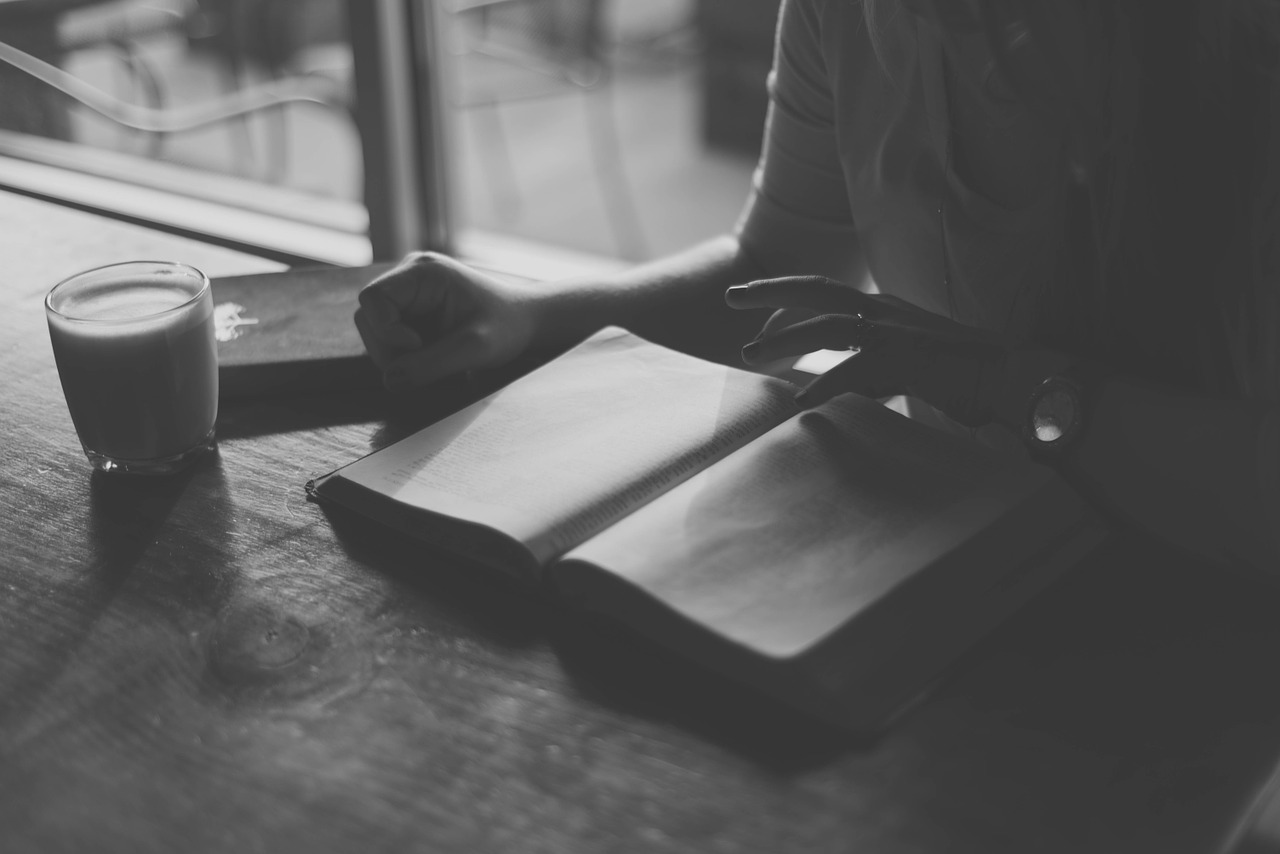

[Photo Source]('https://pixabay.com/photos/book-reading-monochrome-read-study-1149031/')

### **Detecting spam at scale** (Story)

 When Bayes reconvened with the crowd in two hours, it was apparent word had spread rapidly throughout town. It seemed that the university administrators had also heard about the popularity of his groundbreaking discovery. Rather than the classical Rennaissance-era lecture hall he was provided with earlier, the university instead moved him to the the massive, open-air theatre located higher on the mountainside where the UCI was situated. Bayes welcomed this change. The weather conditions outside were too perfect for a crowd of people to spend indoors. The theatre itself was ancient, dating back to Roman anituity that the university had preserved and re-purposed as an outdoor lecture structure reserved for only the grandest community gatherings. Behind the stage was a magnificent, overlooking view of the ancient city's skyline, consisting of grand cathedrals, masoleums, castles, temples, and old Romanesque buildings. With ten minuites left until his lecture, the theater was now packed as his audience had more than doubled since this morning. Amongst the crowd on the top level was Apache who had brought with him several notable figures within the town's leadership council. 
 
 It turns out that as Bayes was approaching the end of his first lecture session, Apache was hosting his own private discussions with his companions in attendance. They were all very much in agreement that Bayes had taken some tremendous strides in solving this village-wide issue and that they needed to recruit as much influential figures in the town for the second half of Bayes' lecture.
 
 Over the break, Apache took on meetings with several of the town's most influential figures and convinced them of the potential that Bayes' algorithm had. "Even if his algorithm were to fail with his at-scale demonstration, Bayes has already laid enough groundwork for the town to succeed in this fight! Success now lies just over the horizon," Apache told them. It had worked. The town leaders were intrigued by Apache's proposal rode back swiftly to UCI with him to listen in on Bayes' public lecture.
 
 During the interim, Bayes had also came up with a creative way to test it's predictability against the pre-labelled data and was excited to share it. As the lecture drew closer to the scheduled time, Bayes addressed his audience. "Ladies and gentlemen, thank you for taking the time to attend to today's public discourse. It seems that our audience today has increased significantly since this morning so I hope I haven't been saying the wrong things, else I might find myself run out of town this evening," he joked with the crowd. He was pleased that his joke achieved the effect he was hoping for in lightening the atmosphere. "Now let's get on with the show shall we?" For the next hour, Bayes provided a recap of the topics he discussed in the morning, including his philosophy behind his theorem, the algorithm, and how it could be applied towards predicting for spam. 
 
 Now that he had their undivided attention, he explained the methodology that he thought of during the interim for demonstrating his Na&#239;ve Bayes Algorithm. Guided by his belief that one may eventually learn to spot fake mail with enough practice and exposure to data, Bayes demonstrated to his audience that he would split his letter collection 80/20. 80% of his letters would become his `training_set` for him to practice on, and the last 20% test would be his `test_set` for him to measure the fruits of his training by comparing his predictions against the pre-labels. With that, Bayes was reminded of his early days as a statistics student in UCI where he would "train" through his lecture material and textbooks, then *test* himself by reviewing the practice problems, before finally *evaluating* his results by comparing his answers with those on the back the text.

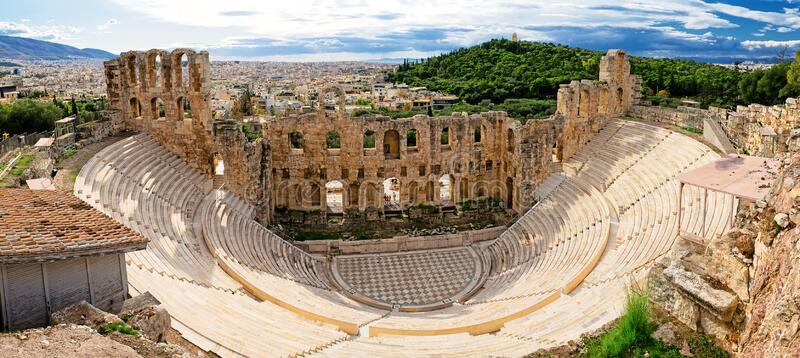

[Photo Source]('https://www.dreamstime.com/antique-open-air-theatre-acropolis-greece-odeon-herodes-atticus-also-called-herodeion-herodion-stone-roman-image192090223')

In [3]:
sms_dataset = sms.copy()
sms_dataset['SMS'] = sms_dataset['SMS'].str.lower()
sms_dataset['SMS'] = sms_dataset['SMS'].str.replace('[^\w\s]','')

In [4]:
randomized_data = sms_dataset.sample(frac=1, random_state=1) # Shuffling the rows of data
train_num = round(len(randomized_data) * 0.8)
training_set = randomized_data[:train_num].reset_index(drop=True) # Creating the training_set
test_set = randomized_data[train_num:].reset_index(drop=True) # Creating the test_set
print("Number of messages in the Training Set: {}\n".format(training_set.shape[0]),
      "Number of messages in the Test Set: {}\n".format(test_set.shape[0]))

Number of messages in the Training Set: 4458
 Number of messages in the Test Set: 1114



"Now ladies and gentlemen, it's time for the main event!" Bayes said to the crowd. "Our **Multinomial Na&#239;ve Bayes Algorithm** can now train on our `training_set` by calculating the constant and the parameters needed for accurately distinguishing spam messages in the future. For the sake of transparency, we've also produced a reference sheet for the algorithm's parameters." To be clear with his audience, Bayes pointed to the equation he was referencing for the inverse probabilities of each word: 
<br>

**Inverse Probability**: $ P(w_{i}|Spam) = \frac{N_{w_{i} | Spam} + \alpha}{N_{spam} + \alpha \times N_{vocabulary}} $

In [5]:
def Naive_Bayesian_parameters(df, message_feature, label_feature):
# Step 1 - Data Cleaning
  message_feature = message_feature.str.lower()
  message_feature = message_feature.str.replace('[^\w\s]','')

# Step 2 - Calculating our 5 Constants
  print("Bayesian Constants", '\n')
  p_ham = label_feature.value_counts(normalize=True)[0]
  print("P(non-spam message): {}\n".format(p_ham))

  p_spam = label_feature.value_counts(normalize=True)[1]
  print("P(spam message): {}\n".format(p_spam))

  n_ham = label_feature.value_counts()[0]
  print("N(non-spam message): {}\n".format(n_ham))
  
  n_spam = label_feature.value_counts()[1]
  print("N(spam message): {}\n".format(n_spam))
  alpha = 1

# Counting our individual vocab words
  message_feature = message_feature.str.split()
  full_vocab = []
  for sentence in message_feature:
      for word in sentence:
          full_vocab.append(word)
  set_vocab = list(set(full_vocab))  
  n_vocab = len(set_vocab)
  print("N(vocabulary): {}\n".format(n_vocab))


# Step 3A - Creating our parameters for spam messages
  spam_messages = df[df['Label'] == "spam"]
  spam_message_feature = spam_messages['SMS'].str.lower()
  spam_message_feature = spam_message_feature.str.replace('[^\w\s]','')
  spam_message_feature = spam_message_feature.str.split()

  spam_full_vocab = []
  for sentence in spam_message_feature:
    for word in sentence:
      spam_full_vocab.append(word)

  set_spam_vocab = list(set(spam_full_vocab))  
  n_words_given_spam = dict(Counter(spam_full_vocab))

  p_word_given_spam_parameters = {word: 1 for word in set_spam_vocab}
  for word in set_spam_vocab:
    p_word_given_spam = ((n_words_given_spam[word] + alpha) / (n_spam + alpha * n_vocab))
    p_word_given_spam_parameters[word] *= p_word_given_spam

# Step 3B - Creating our parameters for non-spam messages
  nonspam = df[df['Label'] == "ham"]
  nonspam_message_feature = nonspam['SMS'].str.lower()
  nonspam_message_feature = nonspam_message_feature.str.replace('[^\w\s]','')
  nonspam_message_feature = nonspam_message_feature.str.split()

  nonspam_full_vocab = []
  for sentence in nonspam_message_feature:
    for word in sentence:
      nonspam_full_vocab.append(word)

  set_nonspam_vocab = list(set(nonspam_full_vocab))  
  n_words_given_nonspam = dict(Counter(nonspam_full_vocab))

  p_word_given_nonspam_parameters = {word: 1 for word in set_nonspam_vocab}
  for word in set_nonspam_vocab:
    p_word_given_nonspam = (n_words_given_nonspam[word] + alpha) / (n_ham + alpha * n_vocab)
    p_word_given_nonspam_parameters[word] *= p_word_given_nonspam

  return n_words_given_spam, n_words_given_nonspam, p_word_given_spam_parameters, p_word_given_nonspam_parameters, p_ham, p_spam

In [6]:
n_spam, n_nonspam, spam_params, nonspam_params, p_ham, p_spam = Naive_Bayesian_parameters(training_set, training_set['SMS'], training_set['Label'])

Bayesian Constants 

P(non-spam message): 0.8654104979811574

P(spam message): 0.13458950201884254

N(non-spam message): 3858

N(spam message): 600

N(vocabulary): 8448



"In essence, the reference sheet will incorporate the individual subcomponents of the **inverse probability** equation that we discussed earlier, such as the percentages and the counts of each word occurring in both types of messages."

Bayes also took the opportunity to highlight his friend's solution for words that appear in one category of messages but not the other. "Ladies and gentlemen, we can already see the impact that my friend Simon has had on tonight's public lecture." Bayes then pointed to the second word listed on his reference sheet. "The word *havent* is an immediate example of the value **Laplace's Smoothing Parameter** because it only appears in nonspam messages and not in spam. Adding a $1$ in this instance is necessary because it would bungle our calculations if we had to divide our numerator (i.e. $ N_{w_{i} | Spam} $) by $0$."

In [7]:
# Creating a DataFrame for the number of times a word appears
n_nonspam = pd.DataFrame(list(n_nonspam.items()), columns=['word', 'N(word | non-spam)'])
n_spam = pd.DataFrame(list(n_spam.items()), columns=['word', 'N(word | spam)'])
n_comparisons = n_spam.merge(n_nonspam, how='inner', on='word')

# Creating a DataFrame for the probability of a word occurring in a spam/nonspam message
p_nonspam_word = pd.DataFrame(list(nonspam_params.items()), columns=['word', 'P(word | non-spam)'])
p_spam_word = pd.DataFrame(list(spam_params.items()), columns=['word', 'P(word | spam)'])
p_comparisons = p_spam_word.merge(p_nonspam_word, how='inner', on='word')

# Tying the DataFrames together to create a reference list for each word
num_prob_comparisons = n_comparisons.merge(p_comparisons, how='inner', on='word')
print(num_prob_comparisons.shape)
num_prob_comparisons.head(20)

(929, 5)


,word,N(word | spam),N(word | non-spam),P(word | spam),P(word | non-spam)
0,why,10,50,0.001216,0.004144
1,havent,1,40,0.000221,0.003332
2,you,246,1491,0.027299,0.121242
3,replied,1,3,0.000221,0.000325
4,to,545,1273,0.060345,0.103527
5,my,6,592,0.000774,0.048188
6,text,89,54,0.009947,0.004469
7,im,11,373,0.001326,0.030392
8,sexy,13,12,0.001547,0.001056
9,female,1,2,0.000221,0.000244


With his reference sheet of parameters, Bayes began predicting the occurrence of spam in the `test_set` by applying his machine-learning algorithm individually on each message. "Again, let's turn our attention back to the equation for **Multinomial Na&#239;ve Bayes Algorithm**."

<br>

**Multinomial Na&#239;ve Bayes Algorithm**: $ P(Spam|w_{1}, w_{2},... w_{n}) \propto P(Spam) \times P(w_{1} | Spam) \times P(w_{2} | Spam) \times ... P(w_{n} | Spam)  $

<br>

VS.

<br>

$ P(NonSpam|w_{1}, w_{2},... w_{n}) \propto P(NonSpam) \times P(w_{1} | NonSpam) \times P(w_{2} | NonSpam) \times ... P(w_{n} | NonSpam)  $

<br>

"Every time a word in the message matches with a word parameter, it will be multiplied along with the constant so as to find $P(Spam|w_{1}, w_{2},... w_{n}) $, which, to remind ourselves, represents the probability of the message being a spam given it's word content. We'll then use the same procedure to find the probability of the message being legit, given it's content $P(NonSpam|w_{1}, w_{2},... w_{n}) $. By comparing these two probabilities, we can then classify message based on whichever one is higher," Bayes concluded. He then went on to apply this procedure and predict the legitimacy of each message.

In [8]:
def Bayes_Judgement(message):
  message = re.sub('\W', ' ', message)
  message = message.lower().split()

  p_ham_given_message = p_ham
  p_spam_given_message = p_spam

  for word in message:
    if word in nonspam_params:
      p_ham_given_message *= nonspam_params[word]
    if word in spam_params:
      p_spam_given_message *= spam_params[word]
    else:
      pass

  # Step 4 - Compare the two probabilities
  if p_ham_given_message > p_spam_given_message:
    return "ham"
  elif p_ham_given_message < p_spam_given_message:
    return "spam"
  else:
    return 'Requires humanly intervention'

In [9]:
test_set['Bayes Judgement'] = test_set['SMS'].apply(Bayes_Judgement)
test_set.head()

,Label,SMS,Bayes Judgement
0,ham,later i guess i needa do mcat study too,ham
1,ham,but i haf enuff space got like 4 mb,spam
2,spam,had your mobile 10 mths update to latest orang...,ham
3,ham,all sounds good fingers makes it difficult to...,spam
4,ham,all done all handed in dont know if mega shop ...,ham


## **Stage 3 - Evaluating the `Bayes_Judgement` model**

Once Bayes had ran his `Bayes_Judgement` model on the `test_set`, he applied some basic metrics to test his model's accuracy and described his thought process with his audience. "The first, and most apparent, metric that's appropriate for our algorithm is calculating for **[accuracy]('https://developers.google.com/machine-learning/glossary#confusion_matrix')**, which we can find by dividing the *number of correct predictions* by the *total number of examples*. For example, if we wanted to identify how accurate our algorithm was at correctly identifying spam messages (also known in this instance as **false negatives**), we would divide the number of correct prediction by the total amount of spam messages in the test set." Bayes then applied this metric to his entire test set and explained his rationale in visualizing his metrics through a two-by-two binary confusion matrix. "In short, a **[Binary Confusion matrix]('https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea')** summarizes our predictive model's accuracy by comparing it's prediction side-by-side with the correct answer."

<br>

$ Accuracy = \frac{Correct Predictions}{Total Number of Examples} $

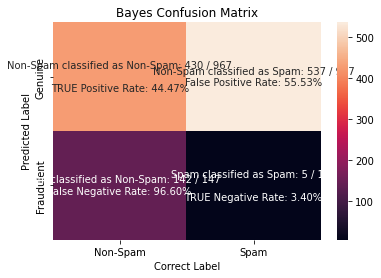

In [10]:
# Run this cell box twice to get an accurate figsize
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_true=test_set['Label'], y_pred=test_set['Bayes Judgement'])
flattened = confusion_matrix.flatten()

total_ham = len(test_set.loc[test_set['Label'] == 'ham'])
total_spam = len(test_set.loc[test_set['Label'] == 'spam'])
totals = [total_ham, total_ham, total_spam, total_spam]

group_counts = [
                "Non-Spam classified as Non-Spam: {} / {}\n".format(flattened[0], total_ham),
                "Non-Spam classified as Spam: {} / {}".format(flattened[1], total_ham),
                "Spam classified as Non-Spam: {} / {}".format(flattened[2],  total_spam),
                "Spam classified as Spam: {} / {}\n".format(flattened[3], total_spam)
                ]
label = ['TRUE Positive Rate: ', 'False Positive Rate: ', 'False Negative Rate: ', 'TRUE Negative Rate: ']

group_percentages = ["{0:.2%}".format(value) for value in flattened / totals]
labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(group_counts, label, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

the_matrix = sns.heatmap(confusion_matrix, annot=labels, fmt='')
sns.set(rc={"figure.figsize":(12, 12)})
plt.title("Bayes Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel('Correct Label')
the_matrix.set(xticklabels=['Non-Spam', 'Spam'], yticklabels=['Genuine', 'Fraudulent'])

plt.show()

In [11]:
accuracy_score = metrics.accuracy_score(y_true=test_set['Label'], y_pred=test_set['Bayes Judgement'], normalize=False)
accuracy_rate = accuracy_score / test_set.shape[0]
print("Total Accuracy Score = {} / {} = {} = {}%".format(accuracy_score, test_set.shape[0], accuracy_rate, round((100 * accuracy_rate), 2)))

Total Accuracy Score = 435 / 1114 = 0.3904847396768402 = 39.05%


Bayes also checked if there were any extraneous discrepancies with his algorithm that he might need to review manually. Thankfully, this wasn't an issue.

In [12]:
human_attention = test_set.loc[test_set['Label'].eq(('ham' or 'spam')) & test_set['Bayes Judgement'].eq('Requires humanly intervention'), ['Label', 'Bayes Judgement']]
print("Messages flagged as requiring human examination: {}".format(len(human_attention)), '\n')

test_set[test_set["Bayes Judgement"] == 'Requires humanly intervention']

Messages flagged as requiring human examination: 0 



,Label,SMS,Bayes Judgement


## **Stage 4 - Prediction & Moving Forward**

Once Bayes had completed logging his metrics and visualizing them for his audience, he was immediately disheartened by the results it had displayed. Bayes disappointingly apologized to his audience. "Ladies and gentlement, unfortunately our algorithm did not produce the results we had hoped for. According to the matrix, the algorithm was only 44.5% effective in accurately identifying genuine messages while only 3.4% effective in catching spam mail. In the broader context of identifying spam, the algorithm was only able to identify 5 of the 147 fraudulent messages in our test dataset. In total, the algorithm only correctly identified 435 of the possible 1114 messages in the dataset, equalling a meager 39.05% **accuracy rate**, numbers that are clearly unacceptable."

Bayes was genuinely baffled his algorithm's preformance as he was sure it would preform well against the `test_set`. "At this point, it's difficult to tell where the algorithm went wrong. My guess is that it had an inadequate amount of spam messages to train on and paramaterize. As you can see, there was almost 6x the amount of nonspam messages (3858 total) in comparison to the spam messages (600). Perhaps having more data for the algorithm to train on could solve this issue but for now, it seems that I've stumbled upon a brick wall that I must continue striving to overcome," Bayes concluded. 

For a few seconds, there was a somber atmosphere in the crowd. Suddenly, Apache stood up and began clapping loudly as if Bayes had just won a prestigious award. Bayes then recognized various members of Victoria's leadership council seated next to Apache who followed his lead and got up to provide Bayes with a standing ovation. Shortly after, the entire theatre was up on their feet, cheering so loudly that Bayes was confident that the rest of the town could hear their applause. *Why were they all chearing so loudly,* Bayes thought. *I accomplished nothing from today's lecture except a highly flawed algorithm that I'm no longer confident in.*

Apache then went down to the stage and signalled the crowd to quiet down. "Bayes, although your Na&#239;ve Bayes Algorithm today wasn't perfect, do not be discouraged by your result by letting perfect be the enemy of good," Apache said to him. "You've made a massive breakthrough today which I'm confident can be refined over time with more data, better methods, and more investment. It's clear that the theorem you proposed earlier today established a solid foundation for solving larger problems, aside from detecting fraudulent letters. Therefore, on behalf of the leadership team here in Victoria and in the presence of the community here today, I am pleased to present to you, not only the title of Lordship over this town, but also a Professorship chair in this University! Congratulations on your new appointments, Professor Bayes. We look forward to your future contributions over Victoria's wellbeing."

Bayes was awestruck by Apache's declarations. The crowd immediately roared with thunderous applause. Once again that day, Bayes' friends Prof. Frequentia and Simon were clapping feverenly over his new appointment. Apache was even more thrilled of the possibilities that Bayes' Theorem had in solving larger-scale issues. *This was undoubtedly the right decision and the council is lucky to have him as an ally. On his own, Bayes has already accomplished quite a lot without much help. One can only imagine what we can accomplish by backing him and his friends with the right tools and capital to succeed!* 

# **Part II: Using PySpark to implement the Naive Bayes Spam Filter**

*If you've made it this far, thank you for taking the time to read through my first attempt at using narrative storytelling to explain the mechanisms behind [Na&#239;ve Bayes]('https://ai.plainenglish.io/build-naive-bayes-spam-classifier-on-pyspark-58aa3352e244'). AI explainability is a concern that prevents wider adoption and trust of the technology. I hope that my project can become one of many that aims to fill that gap. Our brains are hardwired to encode information communicated through stories which is why people always tend to gravitate towards well-developed movies, novels, and other media devices. On a side note, many of the characters in this story were named after actual historical figures that were pivotal in the development and dissemination of Bayes Theorem. Without the contributions of Thomas Bayes, Richard Price, and Simon-Pierre LaPlace, we may have never had the groundbreaking contributions that transformed academic fields like Statistics, Data Science, Machine Learning, and Medicine.*

*In Part II of this project, I plan to develop another story that focuses on [Apache]('https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.NaiveBayes.html')'s contributions to illustrate how specific tools, libraries, and analytical engines can use the same algorithm to build better predictive models. The code for the project has already been written to provide a skeleton structure framework for the next story. I can't wait to begin the next phase of this project but to do so, I'll need your help in giving me feedback to improve how I can tell this story. So if it isn't too much trouble, please leave me a review and share this publication amongst your friends, colleagues, or even family members. I want to be as great of a Data Storyteller as possible, but I can't do so without your support. Until then, be on the lookout for the next phase of Thomas and Apache's scholarly adventures in Bayesian Statistics.*

Mahalo!


## Stage 0 - Preparing the PySpark Environment

In this stage, we will be using `!pip install` to download PySpark library for all the Machine Learning functions we'll be using in our Naive Bayes Algorithm. The code `spark = SparkSession.builder.appName('Bayesian Spam Filter').getOrCreate()` allows us to interact with the **Apache Spark** API via a `SparkSession`. The documentation for initializing a PySpark environment can be found [here]('https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html').

In [13]:
!pip install pyspark

In [14]:
import pyspark.sql
import pyspark.ml
import pyspark.mllib

In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Bayesian Spam Filter').getOrCreate()
spark

## Stage 1 - Building an Extract, Transform, and Load (ETL) Pipeline for the Data

In this stage, we will convert the `sms` dataset into a DataFrame format and then run it through an ETL Pipeline so that it's easily digestible for the **PySpark** library. 

Our ETL pipeline will apply various transformations to the columns so that they're ready to be digested as features later when we use PySpark's `NaiveBayes` algorithm for our model. 

In [16]:
# Uploading the dataset 

sms_pyspark = sms.copy()
sms_pyspark = spark.createDataFrame(sms_pyspark)
sms_pyspark.show(5)

+-----+--------------------+
|Label|                 SMS|
+-----+--------------------+
|  ham|Go until jurong p...|
|  ham|Ok lar... Joking ...|
| spam|Free entry in 2 a...|
|  ham|U dun say so earl...|
|  ham|Nah I don't think...|
+-----+--------------------+
only showing top 5 rows



In [17]:
# Creating stages for a pipeline to ingest data and transform them for the PySpark Naive Bayes model to ingest

from pyspark.ml import feature

stages = []

# Transform 1 - Clean the data by splitting them and coverting them into lists within each cell.
regexTokenizer = feature.RegexTokenizer(inputCol='SMS', outputCol='Tokens', pattern='\\W+')
stages += [regexTokenizer]


# Transform 2 - Assign numerical tokens to each word in the SMS message.
countVectorize = feature.CountVectorizer(inputCol='Tokens', outputCol='token_features', minDF=2.0)
stages += [countVectorize]


# Transform 3 - Encoding the string labels into numbers - 0 or 1
indexer = feature.StringIndexer(inputCol="Label", outputCol="label_index")
stages += [indexer]


# Transform 4 - Convert each individual word in the SMS message into weights for the Naive Bayes ML Model to later train on

vectorAssembler = feature.VectorAssembler(inputCols=['token_features'], outputCol='features')
stages += [vectorAssembler]

[print(stage, '\n') for stage in stages]

RegexTokenizer_4b89a2865ba1 

CountVectorizer_3acdc6902f78 

StringIndexer_bcad45879c09 

VectorAssembler_2ffbf414ce6f 



[None, None, None, None]

In [18]:
# Ingesting the data through a pipeline and applying the transforms we've specicified above

from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)
sms_pyspark = pipeline.fit(sms_pyspark).transform(sms_pyspark)

In [19]:
sms_pyspark.show(5)

+-----+--------------------+--------------------+--------------------+-----------+--------------------+
|Label|                 SMS|              Tokens|      token_features|label_index|            features|
+-----+--------------------+--------------------+--------------------+-----------+--------------------+
|  ham|Go until jurong p...|[go, until, juron...|(4249,[7,52,60,61...|        0.0|(4249,[7,52,60,61...|
|  ham|Ok lar... Joking ...|[ok, lar, joking,...|(4249,[5,48,343,4...|        0.0|(4249,[5,48,343,4...|
| spam|Free entry in 2 a...|[free, entry, in,...|(4249,[1,3,7,17,2...|        1.0|(4249,[1,3,7,17,2...|
|  ham|U dun say so earl...|[u, dun, say, so,...|(4249,[5,25,59,11...|        0.0|(4249,[5,25,59,11...|
|  ham|Nah I don't think...|[nah, i, don, t, ...|(4249,[0,1,23,65,...|        0.0|(4249,[0,1,23,65,...|
+-----+--------------------+--------------------+--------------------+-----------+--------------------+
only showing top 5 rows



## Stage 2 - Create & Train the Bayes_Judgement model

In [21]:
from pyspark.ml.classification import NaiveBayes

# Establishing the training and test datasets
training_set, test_set = sms_pyspark.randomSplit([0.8, 0.2], seed=2021)  
training_set.show(5)

# Creating a Naive Bayes training Model from which we'll run on a test set
Naive_Bayes = NaiveBayes(featuresCol='features', labelCol='label_index', smoothing=1.0, modelType="multinomial")
Bayes_Judgement = Naive_Bayes.fit(training_set)  # The model

+-----+--------------------+--------------------+--------------------+-----------+--------------------+
|Label|                 SMS|              Tokens|      token_features|label_index|            features|
+-----+--------------------+--------------------+--------------------+-----------+--------------------+
|  ham| &lt;#&gt;  mins ...|[lt, gt, mins, bu...|(4249,[0,1,26,43,...|        0.0|(4249,[0,1,26,43,...|
|  ham| and  picking the...|[and, picking, th...|(4249,[6,46,50,17...|        0.0|(4249,[6,46,50,17...|
|  ham| gonna let me kno...|[gonna, let, me, ...|(4249,[8,9,16,50,...|        0.0|(4249,[8,9,16,50,...|
|  ham|&lt;#&gt;  am I t...|[lt, gt, am, i, t...|(4249,[0,19,43,44...|        0.0|(4249,[0,19,43,44...|
|  ham|&lt;#&gt;  great ...|[lt, gt, great, l...|(4249,[2,24,43,44...|        0.0|(4249,[2,24,43,44...|
+-----+--------------------+--------------------+--------------------+-----------+--------------------+
only showing top 5 rows



In [22]:
# Making predictions on the test set
Bayes_Judgement = Bayes_Judgement.transform(test_set)
Bayes_Judgement.show(10)

+-----+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+----------+
|Label|                 SMS|              Tokens|      token_features|label_index|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+----------+
|  ham| said kiss, kiss,...|[said, kiss, kiss...|(4249,[0,1,3,4,8,...|        0.0|(4249,[0,1,3,4,8,...|[-181.13533745776...|[0.99999999999999...|       0.0|
|  ham|&lt;#&gt;  is fas...|[lt, gt, is, fast...|(4249,[1,3,4,5,8,...|        0.0|(4249,[1,3,4,5,8,...|[-402.95906698561...|[1.0,7.7787796769...|       0.0|
|  ham|&lt;#&gt; ISH MIN...|[lt, gt, ish, min...|(4249,[43,44,64,2...|        0.0|(4249,[43,44,64,2...|[-67.372721608690...|[0.99999970472609...|       0.0|
|  ham|                 645|               [645]|        (

## Stage 3 - Evaluate the Bayes_Judgement model

Outline the evaluation metrics used.

Note - This StackOverflow [post]('https://stackoverflow.com/questions/60772315/how-to-evaluate-a-classifier-with-pyspark-2-4-5') helped us learn how to implement the `BinaryClassifcationMetrics` PySpark ML Library function for a more granular look at our model's accuracy.

In [23]:
# Evaluating the model's preformance using PySpark ML's Binary Classification Evaluator 

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

binary_classfication_metrics = BinaryClassificationMetrics(Bayes_Judgement.rdd.map(tuple))
binary_classfication_metrics

evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol='label_index')
bayes_accuracy1 = evaluator.evaluate(Bayes_Judgement, {evaluator.metricName: 'areaUnderROC'})
print("Accuracy of Bayes' Judgement (Area under the ROC curve): {}% \n".format(100 * round(bayes_accuracy1, 4)))

bayes_accuracy2 = evaluator.evaluate(Bayes_Judgement, {evaluator.metricName: 'areaUnderPR'})
print("Accuracy of Bayes' Judgement (Area under the PR curve): {}%".format(100 * round(bayes_accuracy2, 4)))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



Accuracy of Bayes' Judgement (Area under the ROC curve): 94.88% 

Accuracy of Bayes' Judgement (Area under the PR curve): 93.47999999999999%


## Stage 4 - Predict

After using PySpark's native [Binary Classification Evaluator]('https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.BinaryClassificationEvaluator.html'), we've verified our "Bayes Judgement" model can be up to 95% accurate at detecting spam messages. From this, we can continue building on the model by training on larger datasets and generating predictions so long as they're within a structured as a tabular dataset where it's easy to identify a **feature column** that contains the text messages for the model to ingest, along with a **labelled column** for the model to learn from if we're building on the training data.